In [20]:
!pip3 install matplotlib
!pip3 install wordcloud
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from google.colab import drive
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_cleaned_tweets.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
depression_stress_words = {
    'anxious', 'lonely', 'hopeless', 'empty', 'helpless', 'worthless', 'tired', 'exhausted', 'fatigued', 'miserable',
    'hopelessness', 'numb', 'irritable', 'sorrow', 'suffering', 'suicidal', 'tearful', 'troubled', 'vulnerable', 'crisis',
    'despair', 'disheartened', 'dismal', 'downhearted', 'forlorn', 'gloomy', 'grief', 'melancholy', 'mournful', 'sad',
    'tragic', 'unhappy', 'dejected', 'demoralized', 'devastated', 'discouraged', 'downtrodden', 'low-spirited', 'blue',
    'heartbroken', 'hurt', 'injured', 'pained', 'distressed', 'tormented', 'angry', 'annoyed', 'frustrated', 'irritated',
    'fearful', 'afraid', 'scared', 'terrified', 'worried', 'concerned', 'anxiety', 'panic', 'stress', 'depression', 'suicide',
    'self-harm', 'overwhelmed', 'pressure', 'mental health', 'loneliness', 'isolation', 'disconnected', 'unloved', 'unworthy',
    'worthlessness', 'worthless', 'rejected', 'failure', 'inadequate', 'guilty', 'ashamed', 'self-blame', 'negativity', 'hopeless',
    'meaningless', 'numbness', 'apathy', 'loss', 'trapped', 'confused', 'disoriented', 'disillusioned', 'betrayed', 'humiliated',
    'empty', 'exhausted', 'fatigue', 'irritability', 'anger', 'rage', 'mood swings', 'insomnia', 'sleep problems', 'nightmares',
    'loss of interest', 'withdrawal', 'social withdrawal', 'lethargic', 'energy loss', 'pessimism', 'dysphoria', 'bad mood',
    'foggy', 'lethargy', 'inability to concentrate'
}
stress_scores = {'death': 5, 'emergency': 4, 'urgent': 4, 
                           'crisis': 4, 'trauma': 4, 'disaster': 4, 
                           'injury': 4, 'hospital': 4, 'catastrophe': 4, 
                           'danger': 3, 'threat': 3, 'violence': 3, 'crime': 3,
                           'attack': 3, 'fear': 3, 'panic': 3, 'anxiety': 3, 
                           'terror': 3, 'conflict': 2, 'pressure': 1, 
                           'deadline': 2, 'overwhelmed': 2, 'frustrated': 2, 
                           'exhausted': 2, 'tired': 2, 'fatigue': 2, 'stress': 2, 
                           'anxious': 2, 'challenging': 1, 'difficult': 1, 'complicated': 1,
                           'busy': 1, 'demanding': 1, 'responsibility': 1, 
                           'workload': 1, 'expectations': 1, 'change': 1,
                           'uncertainty': 1, 'unknown': 1, 'new': 1, 
                           'fired': 3, 'laid off': 3, 'termination': 3,
                           'budget cuts': 2, 'bankruptcy': 4, 'divorce': 4, 
                           'break-up': 3, 'death of a loved one': 4, 
                           'health issues': 3, 'major life changes': 2, 
                           'financial problems': 3, 'relationship issues': 2, 
                           'loneliness': 2, 'isolation': 2, 'rejection': 2, 
                           'failure': 2, 'disappointment': 1, 'homesick': 1, 
                           'missing someone': 1, 'nostalgia': 1, 'gratitude': -2, 
                           'joy': -2, 'happiness': -2, 'relief': -2, 'satisfaction': -2, 
                           'contentment': -2, 'calm': -2, 'peace': -2, 'tranquility': -2, 
                           'meditation': -2, 'mindfulness': -2, 'positivity': -2, 'optimism': -2,
                           'hope': -2, 'grateful': -1, 'happy': -1, 'excited': -1, 'adventurous': -1, 
                           'curious': -1, 'motivated': -1, 'enthusiastic': -1, 'confident': -1, 
                           'proud': -1, 'inspired': -1, 'anger': 3, 'rage': 4, 'irritation': 2,
                           'annoyance': 2, 'disgust': 3, 'envy': 2, 'jealousy': 2, 'guilt': 2, 
                           'stressed': 2, 'lonely': 1, 'hopeless': 5, 'empty': 1, 'helpless': 4, 
                           'worthless': 4, 'fatigued': 2, 'miserable': 3, 'hopelessness': 4, 
                           'numb': 3, 'irritable': 2, 'sorrow': 3, 'suffering': 4, 
                           'suicidal': 5, 'tearful': 3, 'troubled': 2, 'vulnerable': 2, 
                           'despair': 4, 'disheartened': 3, 'dismal': 3, 'downhearted': 3, 
                           'forlorn': 3, 'gloomy': 3, 'grief': 4, 'melancholy': 4, 'mournful': 4, 
                           'sad': 3, 'tragic': 5, 'unhappy': 2, 'dejected': 3, 'demoralized': 4, 
                           'devastated': 5, 'discouraged': 3, 'downtrodden': 4, 'low-spirited': 3, 
                           'blue': 3, 'heartbroken': 4, 'hurt': 2, 'injured': 2, 'pained': 2, 
                           'distressed': 3, 'tormented': 4, 'angry': 2, 'annoyed': 1, 'irritated': 2,
                           'fearful': 3, 'afraid': 3, 'scared': 4, 'terrified': 5, 'worried': 2, 
                           'concerned': 2, 'depression': 5, 'suicide': 5, 'self-harm': 4, 
                           'mental health': 4, 'disconnected': 2, 'unloved': 3, 'unworthy': 3, 
                           'worthlessness': 4, 'rejected': 3, 'inadequate': 3, 'guilty': 3, 
                           'ashamed': 3, 'self-blame': 4, 'negativity': 3, 'meaningless': 3, 
                           'numbness': 3, 'apathy': 1, 'loss': 3, 'trapped': 4, 'confused': 2, 
                           'disoriented': 2, 'disillusioned': 2, 'betrayed': 3, 'humiliated': 3, 
                           'irritability': 2, 'mood swings': 2, 'insomnia': 3, 'sleep problems': 2, 
                           'nightmares': 3, 'loss of interest': 2, 'withdrawal': 2, 'social withdrawal': 2,
                           'lethargic': 2, 'energy loss': 2, 'pessimism': 2, 'dysphoria': 3, 'bad mood': 1,
                           'foggy': 2, 'lethargy': 2, 'inability to concentrate': 2}



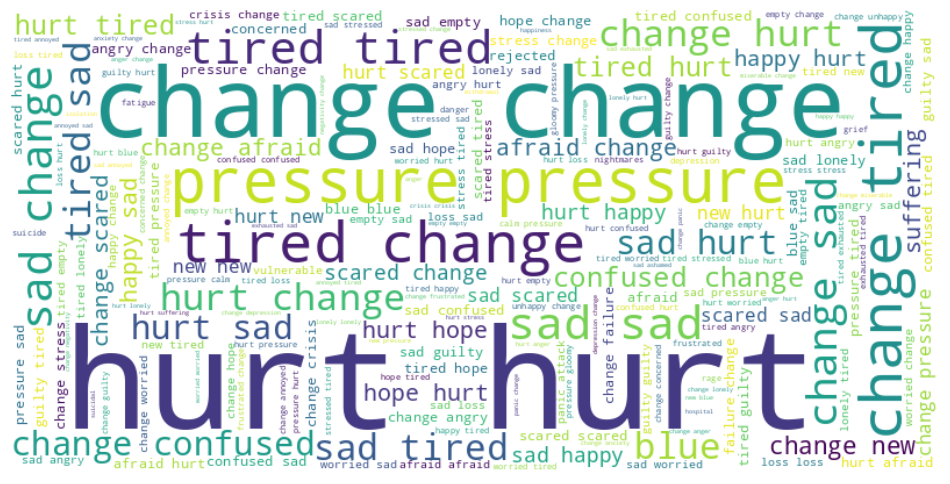

In [37]:
# wordcloud for stress_scores

stress_words_list = list(stress_scores.keys())
#text = " ".join(review for review in data.Text if any(word in review for word in stress_words_list))
text = " ".join(data["Text"].str.lower().apply(lambda x: " ".join([word for word in x.split() if word in stress_words_list])))

wordcloud3 = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color="white").generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

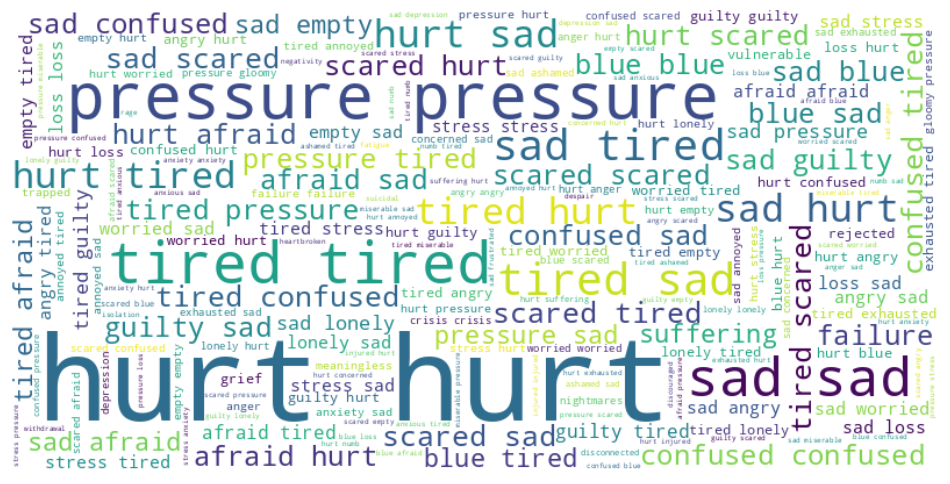

In [38]:
# wordcloud for depression_stress_words

depression_stress_words_set = set(depression_stress_words)

# Extract the words from the "text" column that are in the depression_stress_words_set
words = " ".join(data["Text"].str.lower().apply(lambda x: " ".join([word for word in x.split() if word in depression_stress_words_set])))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color="white").generate(words)

# Display the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()